# Undersampling the Majority Class
**OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------------------------

Let's review some standard methods for dealing with imbalanced datasets. Our goal is to get a balanced sample and there are MANY ways you can choose to go about this.

* **Random Undersampling:** Randomly delete examples in the majority class (until you have matching number of majority and minority class rows).

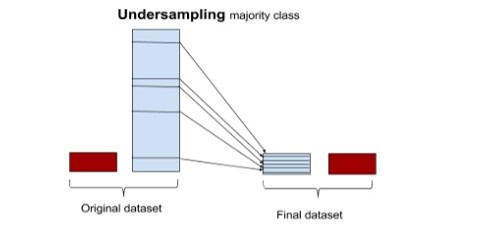

Link for the [original image](https://stats.stackexchange.com/questions/351638/random-sampling-methods-for-handling-class-imbalance).

## Motivation
Imbalanced data (for classification problems) occurs when there is a presence of a minority class. Models built from imbalanced data can result in biased predictions or misleading accuracy.



In [ ]:
# this is to get rid of some annoying future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# An Imbalanced Dataset
The original loan dataset came from an Analytics Vidhya challenge.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let's just quickly drop that annoying ID column.

In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)
df.shape

(614, 12)

And let's see if there are any missing values - there are, so we drop them for simplicity right now.

In [ ]:
#check for missing values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace=True, axis=0)
print(df.shape) # eek, we lost quite a few rows!

(480, 12)


Now let's check for the class distribution of the target variable.

In [ ]:
df['Loan_Status'].value_counts() # imbalanced! uses pandas

Y    332
N    148
Name: Loan_Status, dtype: int64

In [ ]:
Counter(df['Loan_Status']) # same result! uses Counter

Counter({'N': 148, 'Y': 332})

The reason why this is an imbalanced dataset is because there are more of one category vs. another - it's important noting that there is no emotional context of majority and minority class - the minority class is the class that has less rows!

# Balanced Sampling (by hand - random undersampling of majority class)

Before learning about the excellent `imblearn` library, you are going to learn how to break this out by hand.

There are 148 samples in the minority class (N) and 332 in the majority class. The first and easiest method is to randomly grab and equal matching of observations from each class - 148 Y and 148 N. Then simply discard the remaining observations OR use them as a test to see how well your model performs.

In [ ]:
# grab all of the Ns
N_df = df[df['Loan_Status']=='N']
print(N_df.shape)

(148, 12)


In [ ]:
# grab all of the Ys
Y_df = df[df['Loan_Status']=='Y']
print(Y_df.shape)

(332, 12)


In [ ]:
# grab a RANDOM matching number of rows, WITHOUT replacement
# we will name this a different name
Y_subset_df = Y_df.sample(n=N_df.shape[0], replace=False)
print(Y_subset_df.shape)

(148, 12)


In [ ]:
Y_subset_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
213,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
224,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,1.0,Semiurban,Y
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
91,Male,Yes,2,Graduate,No,6250,5654.0,188.0,180.0,1.0,Semiurban,Y
255,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,Y


Great! That all lines up. Now you could just push the two datasets together (and maybe shuffle for good luck...) and then you could split into X and Y.

In [ ]:
balanced_df = N_df.append(Y_subset_df)
print(balanced_df.shape) # voila!

(296, 12)


In [ ]:
148*2 # check your work

296

* **Pro:** you have a balanced dataset, easy to implement.
* **Con:** if you only have a few rows, then perhaps you are not going to learn enough for the rows that are available - you may be ignoring important information.

# Split data into X and Y
The above example was to get your feet wet - now let's split the original data into X and Y and utilize the `imblearn` package.

In [ ]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)
print(X.shape, y.shape)

(480, 11) (480,)


# Random Undersampling (the majority class)
**Random Undersampling:** Randomly delete examples in the majority class.

Note the difference in `sampling_strategy` below - it's to undersample the MAJORITY class.

In [ ]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({'N': 148, 'Y': 148})


Before performing random undersampling, you want to:
* Make sure any categorical variables are dummy values or label encoded
* Save a chunk of data on the side before performing any sampling/manipulation
  * It's important to have this chunk on the side so you are confident that the accuracy you report on the balanced sample will be the same as (consistent with) the holdout chunk.
* Then perform any sampling strategy (random undersampling)
* Split your sampled data in train/test, fit a model, then evaluate on test AND your holdout sample (with original distribution of the data).

In [ ]:
X_under

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
1,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
2,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
3,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural
4,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
291,Male,No,0,Graduate,No,1926,1851.0,50.0,360.0,1.0,Semiurban
292,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
293,Male,Yes,0,Graduate,No,9323,0.0,75.0,180.0,1.0,Urban
294,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban
